In [1]:
import pandas as pd

file_path = 'Grocery_Items_30.csv'
data = pd.read_csv(file_path, header=0)  

print("Original dataset:")
print(data.head())

data = data.apply(lambda row: row.dropna().tolist(), axis=1)
print("\nDataset after removing null values within each row:")
print(data)

flattened_items = [item for sublist in data for item in sublist]  
items_series = pd.Series(flattened_items)
items_series = items_series.str.strip()

unique_items = items_series.nunique()
print(f"\nNumber of unique items: {unique_items}")

total_records = len(data)
print(f"Number of transactions: {total_records}")

most_popular_item = items_series.value_counts().idxmax()
most_popular_count = items_series.value_counts().max()
print(f"Most popular item: {most_popular_item}, Transactions: {most_popular_count}")


Original dataset:
                  0            1              2            3    4    5    6  \
0  other vegetables        candy            NaN          NaN  NaN  NaN  NaN   
1         pip fruit       yogurt            NaN          NaN  NaN  NaN  NaN   
2              meat         soda  cream cheese           NaN  NaN  NaN  NaN   
3              pork      dessert            NaN          NaN  NaN  NaN  NaN   
4  other vegetables  hard cheese         liquor  brown bread  NaN  NaN  NaN   

     7    8   9  10  
0  NaN  NaN NaN NaN  
1  NaN  NaN NaN NaN  
2  NaN  NaN NaN NaN  
3  NaN  NaN NaN NaN  
4  NaN  NaN NaN NaN  

Dataset after removing null values within each row:
0                               [other vegetables, candy]
1                                     [pip fruit, yogurt]
2                             [meat, soda, cream cheese ]
3                                         [pork, dessert]
4       [other vegetables, hard cheese, liquor, brown ...
                              ..

In [3]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import fpgrowth, association_rules


file_path = 'Grocery_Items_30.csv' 
data1 = pd.read_csv(file_path)
transaction_list= data1.stack().groupby(level=0).apply(lambda x: x.tolist())

te = TransactionEncoder()
te_ary = te.fit(transaction_list).transform(transaction_list)
df = pd.DataFrame(te_ary, columns=te.columns_)

frequent_itemsets = fpgrowth(df, min_support=0.01, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.124000,(other vegetables)
1,0.012500,(candy)
2,0.089250,(yogurt)
3,0.048375,(pip fruit)
4,0.093125,(soda)
...,...,...
64,0.019625,(salty snack)
65,0.014375,"(other vegetables, whole milk)"
66,0.012375,"(whole milk, yogurt)"
67,0.013500,"(rolls/buns, whole milk)"


In [4]:
association_rules(frequent_itemsets, metric="confidence", min_threshold=0.08, num_itemsets=8000)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(other vegetables),(whole milk),0.12400,0.15750,0.014375,0.115927,0.736047,1.0,-0.005155,0.952976,-0.290463,0.053814,-0.049344,0.103599
1,(whole milk),(other vegetables),0.15750,0.12400,0.014375,0.091270,0.736047,1.0,-0.005155,0.963983,-0.298565,0.053814,-0.037363,0.103599
2,(yogurt),(whole milk),0.08925,0.15750,0.012375,0.138655,0.880352,1.0,-0.001682,0.978122,-0.129850,0.052800,-0.022367,0.108613
3,(rolls/buns),(whole milk),0.11225,0.15750,0.013500,0.120267,0.763602,1.0,-0.004179,0.957677,-0.258561,0.052683,-0.044193,0.102991
4,(whole milk),(rolls/buns),0.15750,0.11225,0.013500,0.085714,0.763602,1.0,-0.004179,0.970977,-0.268716,0.052683,-0.029891,0.102991
5,(rolls/buns),(other vegetables),0.11225,0.12400,0.010375,0.092428,0.745384,1.0,-0.003544,0.965212,-0.277865,0.045932,-0.036042,0.088048
6,(other vegetables),(rolls/buns),0.12400,0.11225,0.010375,0.083669,0.745384,1.0,-0.003544,0.968810,-0.280546,0.045932,-0.032194,0.088048


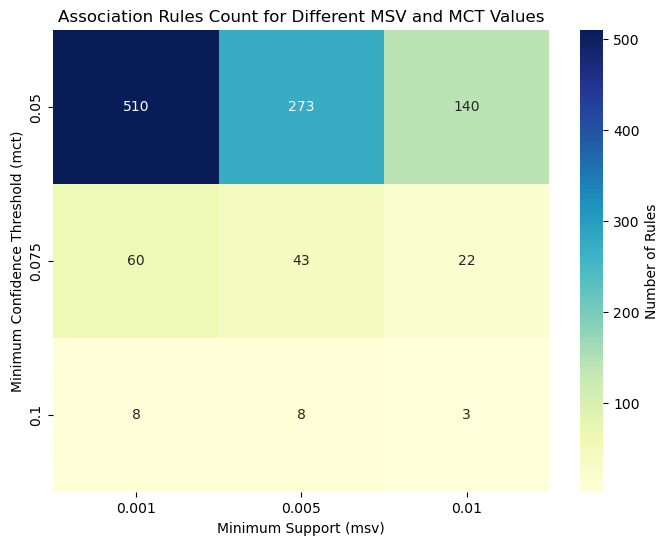

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules

msv_values = [0.001, 0.005, 0.01]
mct_values = [0.05, 0.075, 0.1]

rule_counts = []

for msv in msv_values:
    row = []
    for mct in mct_values:
        frequent_itemsets = apriori(df, min_support=msv, use_colnames=True)

        rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=mct, num_itemsets=8000)
        
        row.append(len(rules))
    
    rule_counts.append(row)

heatmap_data = pd.DataFrame(rule_counts, index=mct_values, columns=msv_values)

plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='d', cbar_kws={'label': 'Number of Rules'})
plt.title('Association Rules Count for Different MSV and MCT Values')
plt.xlabel('Minimum Support (msv)')
plt.ylabel('Minimum Confidence Threshold (mct)')
plt.show()
